In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

# wrangle
from env import user, password, host
import os

# transform
import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

# working with dates
from datetime import datetime

# modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 


In [2]:
df = pd.read_csv('saas.csv')

In [3]:
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [4]:
df.shape

(790458, 5)

In [5]:
# lowercase column names and resetting index
df.columns = df.columns.str.lower()

In [6]:
# resetting index to month_invoiced
# df.reset_index('month_invoiced')
# the data type
df.dtypes

month_invoiced        object
customer_id            int64
invoice_id             int64
subscription_type    float64
amount               float64
dtype: object

In [8]:
# from object to datetime
df['month_invoiced'] = pd.to_datetime(df.month_invoiced)

In [12]:
# setting index to the datetimes
df = df.set_index('month_invoiced').sort_index()

In [13]:
# this data is very clearly only meant to be used for 
df[['subscription_type', 'amount']].describe()

,subscription_type,amount
count,790458.000000,790458.000000
mean,0.599235,2.996174
std,0.950380,4.751901
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,5.000000
max,4.000000,20.000000


In [19]:
# resampling by month
df_resampled = df.resample('W')[['amount']].sum()

In [24]:
# setting sizes
train_size = int(len(df_resampled) * .7)
test_size = int(len(df_resampled) - train_size)

In [25]:
# get train and test df
train = df_resampled[:train_size]
test = df_resampled[train_size:]

# Visuals

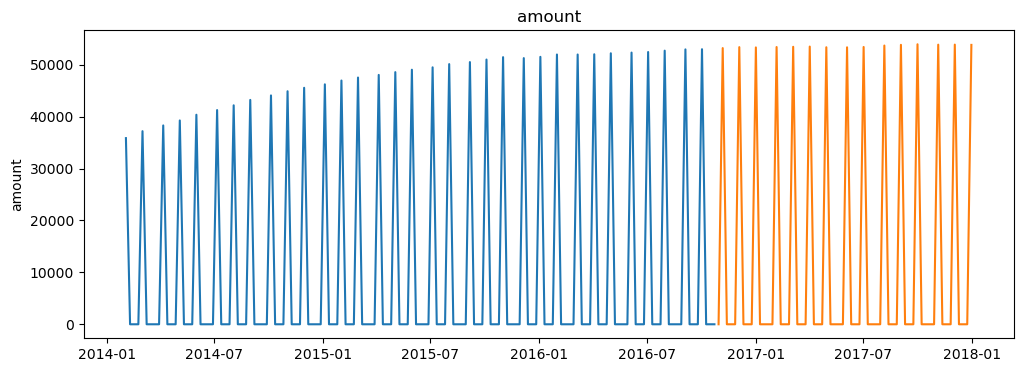

In [28]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

### Eval

In [29]:
# evaluation function to compute rmse
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [30]:
# plot and evaluate 
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [31]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df


,model_type,target_var,rmse


In [32]:
# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)


Baselines

In [44]:
# last oobserved value
train['amount'][-1:]

month_invoiced
2016-10-23    0.0
Freq: W-SUN, Name: amount, dtype: float64

In [47]:
# simple average
avg_amount = round(train['amount'].mean(), 2)

yhat_df = pd.DataFrame({'amount': [avg_amount]},
                      index = test.index)

yhat_df.head(2)

,amount
month_invoiced,
2016-10-30,10944.86
2016-11-06,10944.86


In [48]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'simple_avg_baseline', 
                             target_var = col)

NameError: name 'validate' is not defined